# Augmentation considering occlusion

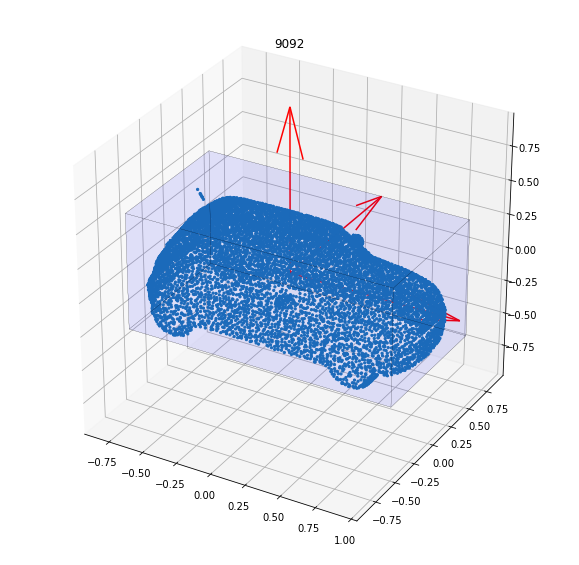

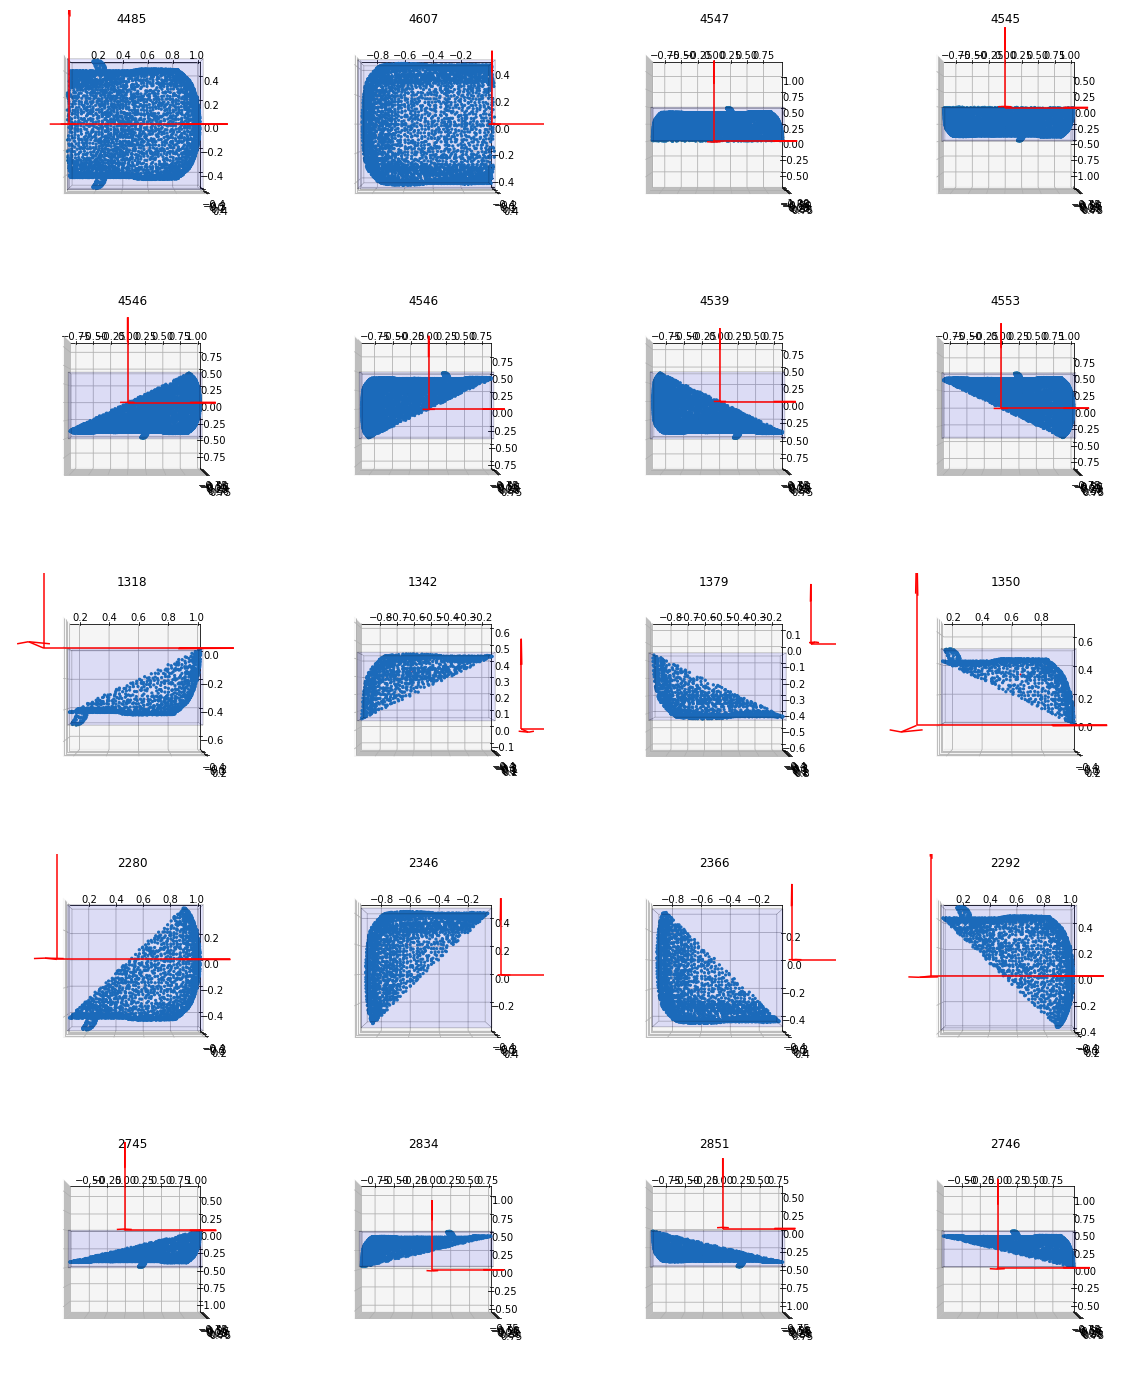

In [2]:
import numpy as np
import os
from visualization import *

pc = np.load("/media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/pointcloud_from_stl/car_np_point_align_align_surface_points/car_0037_align_align_se.npy")

pc -= np.mean(pc)
pc /= np.max(abs(pc))

%matplotlib inline
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_title("{}".format(len(pc)))
display_point_cloud_box_ax_test(ax, pc)

plt.show()

# strategy 1
pc1 = pc.copy()
pc1 = pc1[pc1[:,0] > 0]

pc2 = pc.copy()
pc2 = pc2[pc2[:,0] < 0]

pc3 = pc.copy()
pc3 = pc3[pc3[:,1] > 0]

pc4 = pc.copy()
pc4 = pc4[pc4[:,1] < 0]

# strategy 2
pc5 = pc.copy()
max_val = np.max(pc5, axis=0)
pc5 = pc5[ pc5[:,0] * max_val[1] / max_val[0] > pc5[:,1] ]

pc6 = pc.copy()
max_val = np.max(pc6, axis=0)
pc6 = pc6[ pc6[:,0] * max_val[1] / max_val[0] < pc6[:,1] ]

pc7 = pc.copy()
max_val = np.max(pc7, axis=0)
pc7 = pc7[ - pc7[:,0] * max_val[1] / max_val[0] > pc7[:,1] ]

pc8 = pc.copy()
max_val = np.max(pc8, axis=0)
pc8 = pc8[ - pc8[:,0] * max_val[1] / max_val[0] < pc8[:,1] ]

# strategy 3
pc9 = pc.copy()
max_val = np.max(pc9, axis=0)
pc9 = pc9[ pc9[:,0] * max_val[1] / max_val[0] > pc9[:,1] + max_val[1] ]

pc10 = pc.copy()
max_val = np.max(pc10, axis=0)
pc10 = pc10[ pc10[:,0] * max_val[1] / max_val[0] < pc10[:,1] - max_val[1] ]

pc11 = pc.copy()
max_val = np.max(pc11, axis=0)
pc11 = pc11[ - pc11[:,0] * max_val[1] / max_val[0] > pc11[:,1] + max_val[1] ]

pc12 = pc.copy()
max_val = np.max(pc12, axis=0)
pc12 = pc12[ - pc12[:,0] * max_val[1] / max_val[0] < pc12[:,1] - max_val[1] ]

# strategy 4
pc13 = pc.copy()
max_val = np.max(pc13, axis=0)
pc13 = pc13[ pc13[:,0] * 2. * max_val[1] / max_val[0] > pc13[:,1] + max_val[1] ]

pc14 = pc.copy()
max_val = np.max(pc14, axis=0)
pc14 = pc14[ pc14[:,0] * 2. * max_val[1] / max_val[0] < pc14[:,1] - max_val[1] ]

pc15 = pc.copy()
max_val = np.max(pc15, axis=0)
pc15 = pc15[ - pc15[:,0] * 2. * max_val[1] / max_val[0] > pc15[:,1] + max_val[1] ]

pc16 = pc.copy()
max_val = np.max(pc16, axis=0)
pc16 = pc16[ - pc16[:,0] * 2. * max_val[1] / max_val[0] < pc16[:,1] - max_val[1] ]

# strategy 5
pc17 = pc.copy()
max_val = np.max(pc17, axis=0)
pc17 = pc17[ pc17[:,0] * 0.5 * max_val[1] / max_val[0] > pc17[:,1] + 0.5*max_val[1] ]

pc18 = pc.copy()
max_val = np.max(pc18, axis=0)
pc18 = pc18[ pc18[:,0] * 0.5 * max_val[1] / max_val[0] < pc18[:,1] - 0.5*max_val[1] ]

pc19 = pc.copy()
max_val = np.max(pc19, axis=0)
pc19 = pc19[ - pc19[:,0] * 0.5 * max_val[1] / max_val[0] > pc19[:,1] + 0.5*max_val[1] ]

pc20 = pc.copy()
max_val = np.max(pc20, axis=0)
pc20 = pc20[ - pc20[:,0] * 0.5 * max_val[1] / max_val[0] < pc20[:,1] - 0.5*max_val[1] ]

strategy = 5


%matplotlib inline
fig = plt.figure(figsize = (20,strategy * 5))

ax = fig.add_subplot(strategy,4,1, projection='3d')
ax.set_title("{}".format(len(pc1)))
display_point_cloud_box_ax_test(ax, pc1)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,2, projection='3d')
ax.set_title("{}".format(len(pc2)))
display_point_cloud_box_ax_test(ax, pc2)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,3, projection='3d')
ax.set_title("{}".format(len(pc3)))
display_point_cloud_box_ax_test(ax, pc3)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,4, projection='3d')
ax.set_title("{}".format(len(pc4)))
display_point_cloud_box_ax_test(ax, pc4)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,5, projection='3d')
ax.set_title("{}".format(len(pc5)))
display_point_cloud_box_ax_test(ax, pc5)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,6, projection='3d')
ax.set_title("{}".format(len(pc6)))
display_point_cloud_box_ax_test(ax, pc6)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,7, projection='3d')
ax.set_title("{}".format(len(pc7)))
display_point_cloud_box_ax_test(ax, pc7)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,8, projection='3d')
ax.set_title("{}".format(len(pc8)))
display_point_cloud_box_ax_test(ax, pc8)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,9, projection='3d')
ax.set_title("{}".format(len(pc9)))
display_point_cloud_box_ax_test(ax, pc9)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,10, projection='3d')
ax.set_title("{}".format(len(pc10)))
display_point_cloud_box_ax_test(ax, pc10)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,11, projection='3d')
ax.set_title("{}".format(len(pc11)))
display_point_cloud_box_ax_test(ax, pc11)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,12, projection='3d')
ax.set_title("{}".format(len(pc12)))
display_point_cloud_box_ax_test(ax, pc12)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,13, projection='3d')
ax.set_title("{}".format(len(pc13)))
display_point_cloud_box_ax_test(ax, pc13)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,14, projection='3d')
ax.set_title("{}".format(len(pc14)))
display_point_cloud_box_ax_test(ax, pc14)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,15, projection='3d')
ax.set_title("{}".format(len(pc15)))
display_point_cloud_box_ax_test(ax, pc15)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,16, projection='3d')
ax.set_title("{}".format(len(pc16)))
display_point_cloud_box_ax_test(ax, pc16)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,17, projection='3d')
ax.set_title("{}".format(len(pc17)))
display_point_cloud_box_ax_test(ax, pc17)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,18, projection='3d')
ax.set_title("{}".format(len(pc18)))
display_point_cloud_box_ax_test(ax, pc18)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,19, projection='3d')
ax.set_title("{}".format(len(pc19)))
display_point_cloud_box_ax_test(ax, pc19)
ax.view_init(elev=90, azim=270)

ax = fig.add_subplot(strategy,4,20, projection='3d')
ax.set_title("{}".format(len(pc20)))
display_point_cloud_box_ax_test(ax, pc20)
ax.view_init(elev=90, azim=270)

plt.show()


## Function implemenation

In [3]:
import os

import numpy as np

def augmentation_occlusion(pc):
        
    pc -= np.mean(pc)
    pc /= np.max(abs(pc))

    pc_aug = []
    pc_aug.append(pc)
    
    # strategy 1
    pc1 = pc.copy()
    pc1 = pc1[pc1[:,0] > 0]

    pc2 = pc.copy()
    pc2 = pc2[pc2[:,0] < 0]

    pc3 = pc.copy()
    pc3 = pc3[pc3[:,1] > 0]

    pc4 = pc.copy()
    pc4 = pc4[pc4[:,1] < 0]

    # strategy 2
    pc5 = pc.copy()
    max_val = np.max(pc5, axis=0)
    pc5 = pc5[ pc5[:,0] * max_val[1] / max_val[0] > pc5[:,1] ]

    pc6 = pc.copy()
    max_val = np.max(pc6, axis=0)
    pc6 = pc6[ pc6[:,0] * max_val[1] / max_val[0] < pc6[:,1] ]

    pc7 = pc.copy()
    max_val = np.max(pc7, axis=0)
    pc7 = pc7[ - pc7[:,0] * max_val[1] / max_val[0] > pc7[:,1] ]

    pc8 = pc.copy()
    max_val = np.max(pc8, axis=0)
    pc8 = pc8[ - pc8[:,0] * max_val[1] / max_val[0] < pc8[:,1] ]

    # strategy 3
    pc9 = pc.copy()
    max_val = np.max(pc9, axis=0)
    pc9 = pc9[ pc9[:,0] * max_val[1] / max_val[0] > pc9[:,1] + max_val[1] ]

    pc10 = pc.copy()
    max_val = np.max(pc10, axis=0)
    pc10 = pc10[ pc10[:,0] * max_val[1] / max_val[0] < pc10[:,1] - max_val[1] ]

    pc11 = pc.copy()
    max_val = np.max(pc11, axis=0)
    pc11 = pc11[ - pc11[:,0] * max_val[1] / max_val[0] > pc11[:,1] + max_val[1] ]

    pc12 = pc.copy()
    max_val = np.max(pc12, axis=0)
    pc12 = pc12[ - pc12[:,0] * max_val[1] / max_val[0] < pc12[:,1] - max_val[1] ]

    # strategy 4
    pc13 = pc.copy()
    max_val = np.max(pc13, axis=0)
    pc13 = pc13[ pc13[:,0] * 2. * max_val[1] / max_val[0] > pc13[:,1] + max_val[1] ]

    pc14 = pc.copy()
    max_val = np.max(pc14, axis=0)
    pc14 = pc14[ pc14[:,0] * 2. * max_val[1] / max_val[0] < pc14[:,1] - max_val[1] ]

    pc15 = pc.copy()
    max_val = np.max(pc15, axis=0)
    pc15 = pc15[ - pc15[:,0] * 2. * max_val[1] / max_val[0] > pc15[:,1] + max_val[1] ]

    pc16 = pc.copy()
    max_val = np.max(pc16, axis=0)
    pc16 = pc16[ - pc16[:,0] * 2. * max_val[1] / max_val[0] < pc16[:,1] - max_val[1] ]

    # strategy 5
    pc17 = pc.copy()
    max_val = np.max(pc17, axis=0)
    pc17 = pc17[ pc17[:,0] * 0.5 * max_val[1] / max_val[0] > pc17[:,1] + 0.5*max_val[1] ]

    pc18 = pc.copy()
    max_val = np.max(pc18, axis=0)
    pc18 = pc18[ pc18[:,0] * 0.5 * max_val[1] / max_val[0] < pc18[:,1] - 0.5*max_val[1] ]

    pc19 = pc.copy()
    max_val = np.max(pc19, axis=0)
    pc19 = pc19[ - pc19[:,0] * 0.5 * max_val[1] / max_val[0] > pc19[:,1] + 0.5*max_val[1] ]

    pc20 = pc.copy()
    max_val = np.max(pc20, axis=0)
    pc20 = pc20[ - pc20[:,0] * 0.5 * max_val[1] / max_val[0] < pc20[:,1] - 0.5*max_val[1] ]
    
    pc_aug.append(pc1)
    pc_aug.append(pc2)
    pc_aug.append(pc3)
    pc_aug.append(pc4)
    pc_aug.append(pc5)
    pc_aug.append(pc6)
    pc_aug.append(pc7)
    pc_aug.append(pc8)
    pc_aug.append(pc9)
    pc_aug.append(pc10)
    pc_aug.append(pc11)
    pc_aug.append(pc12)
    pc_aug.append(pc13)
    pc_aug.append(pc14)
    pc_aug.append(pc15)
    pc_aug.append(pc16)
    pc_aug.append(pc17)
    pc_aug.append(pc18)
    pc_aug.append(pc19)
    pc_aug.append(pc20)
    
    return pc_aug


### Function test

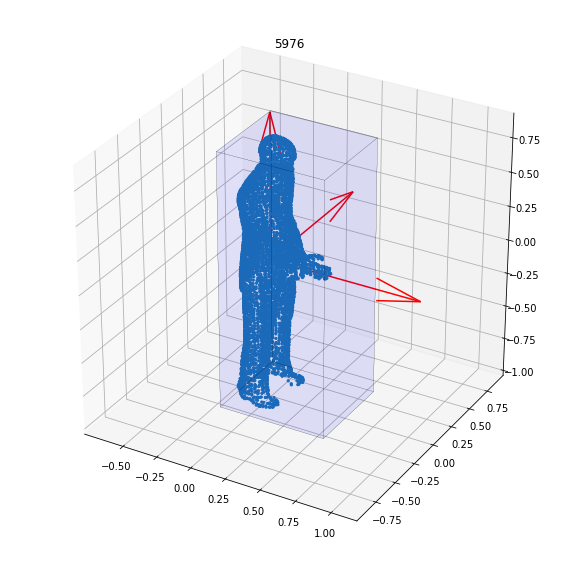

ValueError: zero-size array to reduction operation maximum which has no identity

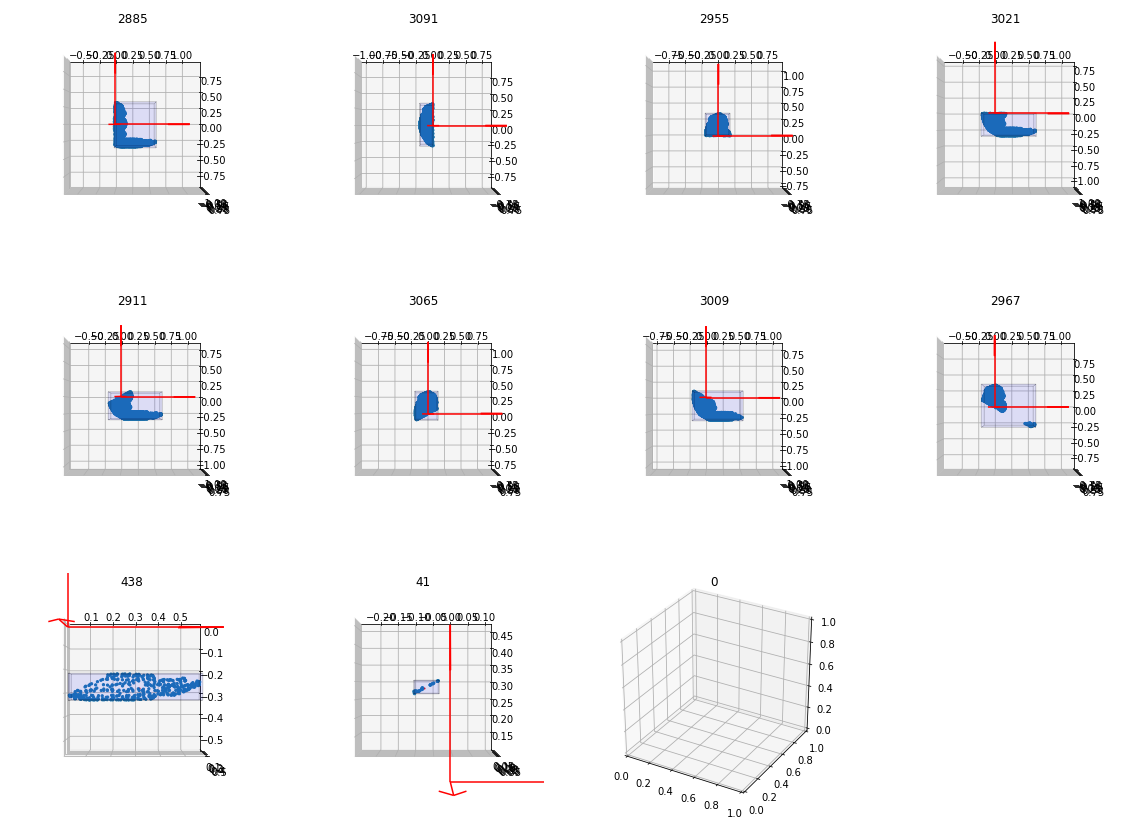

In [6]:
import numpy as np

import os

pc = np.load("/media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/pointcloud_from_stl/pedestrian_np_point_align_align_surface_points/pedestrian_0007_align_align_se.npy")

pc_aug = augmentation_occlusion(pc)

%matplotlib inline
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_title("{}".format(len(pc_aug[0])))
display_point_cloud_box_ax_test(ax, pc_aug[0])

plt.show()


%matplotlib inline
fig = plt.figure(figsize = (20,25))

for i in range(1,len(pc_aug)):
    
    pc_vis = pc_aug[i]
    
    ax = fig.add_subplot(5,4,i, projection='3d')
    ax.set_title("{}".format(len(pc_vis)))
    display_point_cloud_box_ax_test(ax, pc_vis)
    ax.view_init(elev=90, azim=270)

plt.show()
    



## Run all point cloud

In [7]:
import os

import numpy as np


""" file path """
root_path = os.path.abspath('./dataset/point_dataset/2_outer/car/')
out_path = os.path.abspath('./dataset/point_dataset/3_occlu/car')
if not os.path.exists(out_path):
    os.mkdir(out_path)

    
""" find ".npy" files """
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

            
""" run labeling """

for i in range ( 0, len(fname)):
    
    pc = np.load(fname[i])
    
    pc_aug = augmentation_occlusion(pc)
    
    for j in range( len( pc_aug) ):
        
        if len(pc_aug[j]) > 1000:
            out_data_name = fname[i].split('.')[0].split('/')[-1]
            out_data_path = os.path.join(out_path, out_data_name + "_aug_{:03d}".format(j))
            np.save(out_data_path, pc_aug[j] )    
            print "!!save file:", out_data_path
            print "!!number:", j

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0071_align_se_aug_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0071_align_se_aug_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0071_align_se_aug_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0071_align_se_aug_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0071_align_se_aug_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0071_align_se_aug_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0028_align_se_aug_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0028_align_se_aug_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0028_align_se_aug_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0028_align_se_aug_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0028_align_se_aug_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0028_align_se_aug_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0110_align_se_aug_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0110_align_se_aug_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0110_align_se_aug_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0110_align_se_aug_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0110_align_se_aug_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0110_align_se_aug_005
!!number: 5
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0204_align_se_aug_010
!!number: 10
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0204_align_se_aug_011
!!number: 11
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0204_align_se_aug_012
!!number: 12
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0204_align_se_aug_013
!!number: 13
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0204_align_se_aug_014
!!number: 14
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0204_align_se_aug_015
!!number: 15
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0265_align_se_aug_012
!!number: 12
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0265_align_se_aug_013
!!number: 13
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0265_align_se_aug_014
!!number: 14
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0265_align_se_aug_015
!!number: 15
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0265_align_se_aug_016
!!number: 16
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0265_align_se_aug_017
!!number: 17
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3

!!number: 15
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0272_align_se_aug_016
!!number: 16
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0272_align_se_aug_017
!!number: 17
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0272_align_se_aug_018
!!number: 18
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0272_align_se_aug_019
!!number: 19
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0272_align_se_aug_020
!!number: 20
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/car/car_0278_align_se_aug_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/poi

In [8]:
import os

import numpy as np


""" file path """
root_path = os.path.abspath('./dataset/point_dataset/2_outer/pedestrian/')
out_path = os.path.abspath('./dataset/point_dataset/3_occlu/pedestrian')
if not os.path.exists(out_path):
    os.mkdir(out_path)

    
""" find ".npy" files """
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

            
""" run labeling """

for i in range ( 0, len(fname)):
    
    pc = np.load(fname[i])
    
    pc_aug = augmentation_occlusion(pc)
    
    for j in range( len( pc_aug) ):
        
        if len(pc_aug[j]) > 1000:
            out_data_name = fname[i].split('.')[0].split('/')[-1]
            out_data_path = os.path.join(out_path, out_data_name + "_aug_{:03d}".format(j))
            np.save(out_data_path, pc_aug[j] )    
            print "!!save file:", out_data_path
            print "!!number:", j

!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/pedestrian/pedestrian_0002_align_se_aug_000
!!number: 0
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/pedestrian/pedestrian_0002_align_se_aug_001
!!number: 1
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/pedestrian/pedestrian_0002_align_se_aug_002
!!number: 2
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/pedestrian/pedestrian_0002_align_se_aug_003
!!number: 3
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/pedestrian/pedestrian_0002_align_se_aug_004
!!number: 4
!!save file: /media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/3_occlu/pedestrian/pedestrian_0002_align_se_aug_005
!!number: 5
!!save file: /media/ky